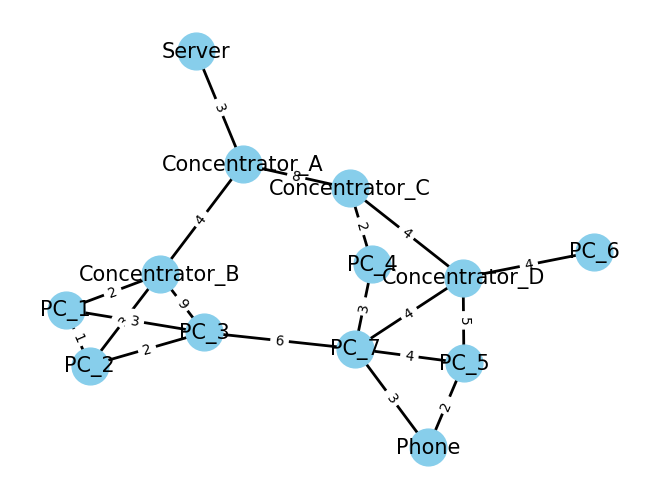

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(["Server", "Concentrator_A", "Concentrator_B",
                  "Concentrator_C", "Concentrator_D","PC_1", "PC_2",
                  "PC_3", "PC_4", "PC_5", "PC_6", "PC_7", "Phone"])

G.add_edge("Server", "Concentrator_A", weight=3)
G.add_edge("Concentrator_A", "Concentrator_B", weight=4)
G.add_edge("Concentrator_A", "Concentrator_C", weight=8)
G.add_edge("Concentrator_C", "Concentrator_D", weight=4)
G.add_edge("Concentrator_B", "PC_1", weight=2)
G.add_edge("Concentrator_B", "PC_2", weight=3)
G.add_edge("Concentrator_B", "PC_3", weight=9)
G.add_edge("PC_1", "PC_2", weight=1)
G.add_edge("PC_2", "PC_3", weight=2)
G.add_edge("PC_3", "PC_1", weight=3),
G.add_edge("Concentrator_C", "PC_4", weight=2)
G.add_edge("Concentrator_D", "PC_5", weight=5)
G.add_edge("Concentrator_D", "PC_6", weight=4)
G.add_edge("Concentrator_D", "PC_7", weight=4)
G.add_edge("PC_7","PC_4", weight=3)
G.add_edge("PC_7","PC_5", weight=4)
G.add_edge("PC_5","Phone", weight=2)
G.add_edge("PC_7","Phone", weight=3)
G.add_edge("PC_3","PC_7", weight=6)

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=15, width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()



In [33]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degree_centrality = nx.degree_centrality(G)

print(f"К-сть нодів: {num_nodes}")
print(f"К-сть еджів: {num_edges}")
print(f"Ступінь центральності: {degree_centrality}")

К-сть нодів: 13
К-сть еджів: 19
Ступінь центральності: {'Server': 0.08333333333333333, 'Concentrator_A': 0.25, 'Concentrator_B': 0.3333333333333333, 'Concentrator_C': 0.25, 'Concentrator_D': 0.3333333333333333, 'PC_1': 0.25, 'PC_2': 0.25, 'PC_3': 0.3333333333333333, 'PC_4': 0.16666666666666666, 'PC_5': 0.25, 'PC_6': 0.08333333333333333, 'PC_7': 0.41666666666666663, 'Phone': 0.16666666666666666}


In [34]:
from collections import deque

def bfs_path(graph, start, goal):
    queue = deque([[start]])
    visited = set()
    while queue:
        path = queue.popleft()
        vertex = path[-1]
        if vertex == goal:
            return path
        elif vertex not in visited:
            visited.add(vertex)
            for current_neighbour in graph.neighbors(vertex):
                new_path = list(path)
                new_path.append(current_neighbour)
                queue.append(new_path)

def dfs_path(graph, start, goal, path=None, visited=None):
    if visited is None:
        visited = set()
    if path is None:
        path = [start]
    if start == goal:
        return path
    visited.add(start)
    for neighbour in graph.neighbors(start):
        if neighbour not in visited:
            new_path = list(path)
            new_path.append(neighbour)
            result_path = dfs_path(graph, neighbour, goal, new_path, visited)
            if result_path:
                return result_path

bfs_result = bfs_path(G, "Server", "Phone")
dfs_result = dfs_path(G, "Server", "Phone")

bfs_result, dfs_result

(['Server', 'Concentrator_A', 'Concentrator_B', 'PC_3', 'PC_7', 'Phone'],
 ['Server',
  'Concentrator_A',
  'Concentrator_B',
  'PC_1',
  'PC_2',
  'PC_3',
  'PC_7',
  'Concentrator_D',
  'PC_5',
  'Phone'])

In [31]:
def dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    unvisited = list(graph.keys())

    while unvisited:
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])
        if distances[current_vertex] == float('infinity'):
            break
        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
        unvisited.remove(current_vertex)
    return distances

graph = {
    "Server": {"Concentrator_A": 3},
    "Concentrator_A": {"Server": 3, "Concentrator_B": 4, "Concentrator_C": 8},
    "Concentrator_B": {"Concentrator_A": 4, "PC_1": 2, "PC_2": 3, "PC_3": 9},
    "Concentrator_C": {"Concentrator_A": 8, "Concentrator_D": 4, "PC_4": 2},
    "Concentrator_D": {"Concentrator_C": 4, "PC_5": 5, "PC_6": 4, "PC_7": 4},
    "PC_1": {"Concentrator_B": 2, "PC_2": 1, "PC_3": 3},
    "PC_2": {"PC_1": 1, "Concentrator_B": 3, "PC_3": 2},
    "PC_3": {"PC_1": 3, "PC_2": 2, "Concentrator_B": 9, "PC_7": 6},
    "PC_4": {"Concentrator_C": 2, "PC_7": 3},
    "PC_5": {"Concentrator_D": 5, "PC_7": 4, "Phone": 2},
    "PC_6": {"Concentrator_D": 4},
    "PC_7": {"Concentrator_D": 4, "PC_4": 3, "PC_5": 4, "Phone": 3},
    "Phone": {"PC_5": 2, "PC_7": 3}
}

print(dijkstra(graph, 'Server'))



{'Server': 0, 'Concentrator_A': 3, 'Concentrator_B': 7, 'Concentrator_C': 11, 'Concentrator_D': 15, 'PC_1': 9, 'PC_2': 10, 'PC_3': 12, 'PC_4': 13, 'PC_5': 20, 'PC_6': 19, 'PC_7': 16, 'Phone': 19}
